Enter size of bord: 8
0th iteration, current cost: 1
10th iteration, current cost: 1
20th iteration, current cost: 0
20th iteration, current cost: 0
solution for 8 Queen is: [(4, 1), (6, 2), (1, 3), (5, 4), (2, 5), (8, 6), (3, 7), (7, 8)]
total time for solution is 0:00:00.004000


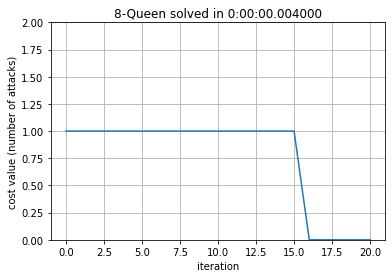

In [ ]:
from __future__ import division
from datetime import datetime
import random
import matplotlib.pyplot as plt
import turtle

Bord_Size = int(input("Enter size of bord: "))   # Number of Queens
PopulationSize = 2 * Bord_Size              # Maximum number of people can live in environment
Population = list()                         # Environment
max_children = PopulationSize//3            # Maximum number of children
max_offspring = 2                           # Maximum number of offspring per crossover
crossoverProbability = 0.5                  # Probability of crossover
mutationProbability = 0.95                  # Probability of mutation


def chess_board(li):

    turtle.tracer(0, 0)
    WIDTH = 40
    turtle.st()
    turtle.pu()
    turtle.goto(-len(li) / 2 * WIDTH, len(li) / 2 * WIDTH)
    turtle.pd()
    turtle.setup(width=len(li) * WIDTH + WIDTH, height=len(li) * WIDTH + WIDTH)
    turtle.title("Solving N-Queen...")

    def square(coloring):
        if coloring:
            turtle.begin_fill()
            for h in range(4):
                turtle.fd(WIDTH)
                turtle.rt(90)
            turtle.end_fill()
        else:
            for k in range(4):
                turtle.fd(WIDTH)
                turtle.rt(90)
    for i in range(1, len(li) + 1):
        for j in range(1, len(li) + 1):
            if ((i+j) % 2 == 0) or (i % 2 != 0 and j % 2 != 0):
                square(True)
                turtle.fd(WIDTH)
            else:
                square(False)
                turtle.fd(WIDTH)
        turtle.pu()
        turtle.goto(-len(li) / 2 * WIDTH, - WIDTH * i + len(li) / 2 * WIDTH)
        turtle.pd()
    turtle.pu()
    turtle.ht()

    for item in enumerate(li, 1):
        if item[0] <= len(li) / 2 and item[1] <= len(li) / 2:
            turtle.goto(-WIDTH * (len(li) / 2 + 1 - item[0]) + WIDTH / 2, WIDTH * (len(li) / 2 + 1 - item[1]) - WIDTH / 2)
            turtle.dot(WIDTH / 2, 'red')
        if item[1] <= len(li) / 2 < item[0]:
            turtle.goto(WIDTH * (item[0] - len(li) / 2) - WIDTH / 2, WIDTH * (len(li) / 2 + 1 - item[1]) - WIDTH / 2)
            turtle.dot(WIDTH / 2, 'red')
        if item[0] <= len(li) / 2 < item[1]:
            turtle.goto(-WIDTH * (len(li) / 2 + 1 - item[0]) + WIDTH / 2, -WIDTH * (item[1] - len(li) / 2) + WIDTH / 2)
            turtle.dot(WIDTH / 2, 'red')
        if item[0] > len(li) / 2 and item[1] > len(li) / 2:
            turtle.goto(WIDTH * (item[0] - len(li) / 2) - WIDTH / 2, -WIDTH * (item[1] - len(li) / 2) + WIDTH / 2)
            turtle.dot(WIDTH / 2, 'red')

    turtle.mainloop()


# cost function
# return number of attacks
def cost(chromosome):
    return sum([1 for i in range(Bord_Size) for j in range(i+1, Bord_Size) if abs(j-i) == abs(chromosome[j] - chromosome[i])])


# parent selection function
# tournament technique
def parent_selection():
    tmp = (list(), Bord_Size)
    for _ in range(PopulationSize // 5):
        ch = random.choice(Population)
        if ch[-1] < tmp[1]:
            tmp = (ch, ch[-1])
    return tmp[0]


# crossover function
# PMX technique
def crossover(parent1, parent2):
    children = list()
    for _ in range(random.randint(1, max_offspring)):
        child = [-1]*(Bord_Size + 1)
        p, q = random.randint(1, Bord_Size//2 - 1), random.randint(Bord_Size//2 + 1, Bord_Size - 2)
        child[p: q+1] = parent1[p: q+1]
        for i in range(p, q+1):
            if parent2[i] not in child:
                t = i
                while p <= t <= q:
                    t = parent2.index(parent1[t])
                child[t] = parent2[i]
        for j in range(Bord_Size):
            if child[j] == -1:
                child[j] = parent2[j]
        child[-1] = cost(child)
        children.append(child)
        parent1, parent2 = parent2, parent1
    return children


# mutation function
# single swap technique
def mutation(chromosome):
    p, q = random.randint(0, Bord_Size - 1), random.randint(0, Bord_Size - 1)
    chromosome[p], chromosome[q] = chromosome[q], chromosome[p]
    chromosome[-1] = cost(chromosome)


if __name__ == "__main__":
    cost_list = list()
    iteration_count = 0
    start_time = datetime.now()

    # initializing PopulationSize chromosome
    for _ in range(PopulationSize):
        chromosome = list(range(1, Bord_Size + 1))
        random.shuffle(chromosome)
        chromosome.append(cost(chromosome))
        Population.append(chromosome)

    # sorting Population with cost key
    Population.sort(key=lambda q: q[-1])
    cost_list.append(Population[0][-1])
    print("%dth iteration, current cost: %d" % (iteration_count, Population[0][-1]))

    # starting algorithm
    while Population[4][-1]:
        random.shuffle(Population)
        # recombine parents
        new_children = list()
        for _ in range(max_children):
            p1, p2 = parent_selection(), parent_selection()
            done = False
            if random.random() < crossoverProbability:
                children = crossover(p1, p2)
                done = True
            else:
                children = [p1[:], p2[:]]
            for child in children:
                if random.random() < mutationProbability or not done:
                    mutation(child)
                new_children.append(child)
        Population.extend(new_children)

        # kill people with upper cost (goal : minimizing cost)
        Population.sort(key=lambda q: q[-1])
        del Population[PopulationSize:]

        cost_list.append(Population[0][-1])
        iteration_count += 1
        if iteration_count % 10 == 0:
            print("%dth iteration, current cost: %d" % (iteration_count, Population[0][-1]))

    end_time = datetime.now()
    del Population[0][-1]
    print("%dth iteration, current cost: %d" % (iteration_count, 0))
    print("solution for %d Queen is: %s"%(Bord_Size,str([pair[::-1] for pair in enumerate(Population[0], 1)])))
    print("total time for solution is %s"%(str(end_time - start_time)))
    iteration = range(len(cost_list))
    plt.plot(iteration, cost_list)
    plt.grid(True)
    if len(cost_list) > 0:
        plt.ylim((0, max(cost_list) + 1))
        plt.ylabel('cost value (number of attacks)')
        plt.xlabel('iteration')
        plt.title(str(str(Bord_Size) + "-Queen solved in " + str(end_time - start_time)))
        plt.show()
    if Bord_Size <= 16:
        chess_board(Population[0])